# 2.1. Problem Statement: Machine Learning 7 
## In this assignment, students will be using the K-nearest neighbors  algorithm to predict how many points NBA players scored in the 2013-2014  season. 

A look at the data 
Before we dive into the algorithm, let’s take a look at our data. Each row in  the data contains information on how a player performed in the 2013-2014  NBA season. 

**Here are some selected columns from the data:**
* player - name of the player 
*pos - the position of the player 
*g - number of games the player was in 
*gs - number of games the player started 
*pts - total points the player scored 

***There are many more columns in the data, mostly containing information  about average player game performance over the course of the season.***

See this site for an explanation of the rest of them. We can read our dataset in and figure out which columns are present:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
import math
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
nba = pd.read_csv('nba_2013.csv')

In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [4]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [6]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:
nba[nba["x3p."].isnull()].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
11,Louis Amundson,PF,31,TOT,19,0,185,16,32,0.500,...,27,55,6,9,11,14,49,38,2013-2014,2013
18,Joel Anthony,C,31,TOT,33,0,186,12,32,0.375,...,23,38,2,3,12,3,17,28,2013-2014,2013


In [8]:
nba.season.value_counts()

2013-2014    481
Name: season, dtype: int64

In [9]:
nba.season_end.value_counts()

2013    481
Name: season_end, dtype: int64

In [10]:
feat_list_obj = []
for i in nba.columns:
    if nba[i].dtype=="object":
        feat_list_obj.append(i)
        
feat_list_obj

['player', 'pos', 'bref_team_id', 'season']

In [11]:
feat_drop_list = feat_list_obj +["season_end","pts"]
feat_drop_list

['player', 'pos', 'bref_team_id', 'season', 'season_end', 'pts']

In [12]:
Features = nba.drop(feat_drop_list,axis=1)
Lables= nba["pts"]
print(Features.shape)
print(Lables.shape)

(481, 25)
(481,)


In [13]:
Features.isnull().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
dtype: int64

In [14]:
Features["fg."].fillna(Features["fg."].mean(),inplace=True)
Features["x2p."].fillna(Features["x2p."].mean(),inplace=True)
Features["efg."].fillna(Features["efg."].mean(),inplace=True)
Features["x3p."].fillna(Features["x3p."].mean(),inplace=True)
Features["ft."].fillna(Features["ft."].mean(),inplace=True)
Y = Lables.values ##--> Dependent Values

In [15]:
Features.isnull().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
dtype: int64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(Features,Y)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 25)
(121, 25)
(360,)
(121,)


In [18]:
sns.set_style("whitegrid")
for k in range(20):
    k_value=1+k
    neu=igh = KNeighborsRegressor(n_neighbors=k_value)
    neu.fit(x_train,y_train)
    y_pred = neu.predict(x_test)
    print("RMSE is :- ",np.sqrt(mean_squared_error(y_pred,y_test)),"For k value {}".format(k_value))

RMSE is :-  88.86125316497392 For k value 1
RMSE is :-  82.83955916096772 For k value 2
RMSE is :-  78.93953353096481 For k value 3
RMSE is :-  72.22560284699306 For k value 4
RMSE is :-  73.88683551763411 For k value 5
RMSE is :-  72.13871063502926 For k value 6
RMSE is :-  72.57319485807122 For k value 7
RMSE is :-  76.62458458490929 For k value 8
RMSE is :-  76.37109751909952 For k value 9
RMSE is :-  77.96782235200652 For k value 10
RMSE is :-  75.8551453334614 For k value 11
RMSE is :-  77.2244888054174 For k value 12
RMSE is :-  76.61007712476186 For k value 13
RMSE is :-  77.53038430710822 For k value 14
RMSE is :-  78.04177850305048 For k value 15
RMSE is :-  80.2516382730359 For k value 16
RMSE is :-  81.28241344715694 For k value 17
RMSE is :-  83.62974282094571 For k value 18
RMSE is :-  84.2171561113578 For k value 19
RMSE is :-  83.95040288544241 For k value 20


In [19]:
#note : It shows that we are get less error for values K =  5 , 6
k_value=5
neuigh=igh = KNeighborsRegressor(n_neighbors=k_value)
neuigh.fit(x_train,y_train)
y_pred = neuigh.predict(x_test)
print("RMSE for KNN Regressor is  :- ",np.sqrt(mean_squared_error(y_pred,y_test)),"For k value {}".format(k_value))
print("R Squared for KNN Regressor is  :- ",r2_score(y_test,y_pred))

RMSE for KNN Regressor is  :-  73.88683551763411 For k value 5
R Squared for KNN Regressor is  :-  0.9703610383923194


Text(0.5, 1.0, 'Actual vs Predicted Points')

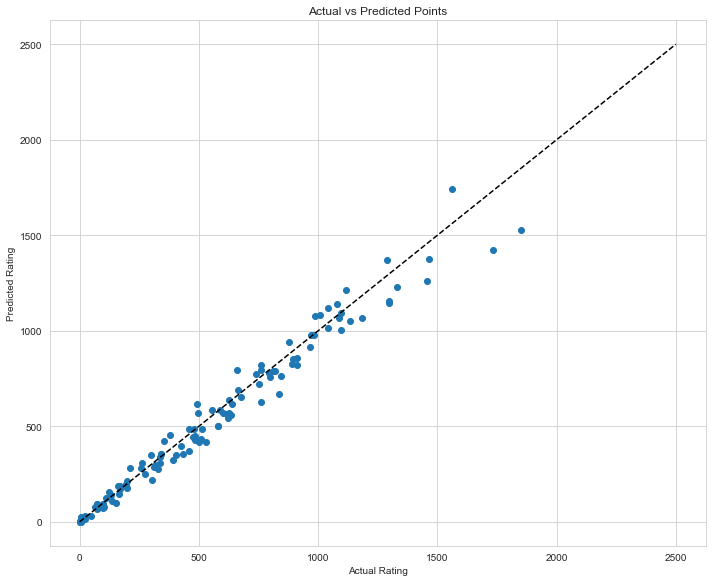

In [20]:
#R squared is a statistical measure of how close the data points are to thr fitted regression line


plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot([0,2500],[0,2500],'--k')
plt.axis("tight")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.title("Actual vs Predicted Points")

In [21]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(random_state = 1)
Rf.fit(x_train,y_train)
y_pred=Rf.predict(x_test)
print("RMSE for RandomForest Regressor is  :- ",np.sqrt(mean_squared_error(y_pred,y_test)))
print("R Squared for RandomForest Regressor is  :- ",r2_score(y_test,y_pred))

RMSE for RandomForest Regressor is  :-  43.25424283397521
R Squared for RandomForest Regressor is  :-  0.9898425129090567


Text(0.5, 1.0, 'Actual vs Predicted Points--RandomForestRegressor')

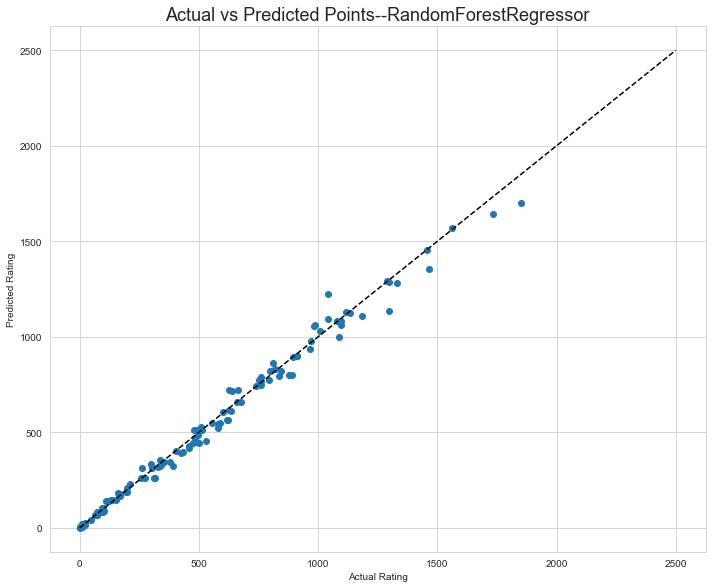

In [22]:
#R squared is a statistical measure of how close the data points are to thr fitted regression line


plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot([0,2500],[0,2500],'--k')
plt.axis("tight")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.title("Actual vs Predicted Points--RandomForestRegressor",fontsize=18)

In [23]:
for depth in range(30):
    depth+=1
    Rf = RandomForestRegressor(max_depth=depth,random_state =1)
    Rf.fit(x_train,y_train)
    y_pred=Rf.predict(x_test)
    print("RMSE is  :- ",np.sqrt(mean_squared_error(y_pred,y_test)),"For Depth value :-",depth)
    

RMSE is  :-  230.5489415724857 For Depth value :- 1
RMSE is  :-  107.58148434819346 For Depth value :- 2
RMSE is  :-  67.55834208828297 For Depth value :- 3
RMSE is  :-  54.60281636989371 For Depth value :- 4
RMSE is  :-  48.56568661113202 For Depth value :- 5
RMSE is  :-  46.33814255372531 For Depth value :- 6
RMSE is  :-  45.82865164515156 For Depth value :- 7
RMSE is  :-  46.0572345946096 For Depth value :- 8
RMSE is  :-  44.3913087385565 For Depth value :- 9
RMSE is  :-  45.03475499611181 For Depth value :- 10
RMSE is  :-  45.52423691405091 For Depth value :- 11
RMSE is  :-  43.94553264841992 For Depth value :- 12
RMSE is  :-  43.308874734690626 For Depth value :- 13
RMSE is  :-  43.25424283397521 For Depth value :- 14
RMSE is  :-  43.25424283397521 For Depth value :- 15
RMSE is  :-  43.25424283397521 For Depth value :- 16
RMSE is  :-  43.25424283397521 For Depth value :- 17
RMSE is  :-  43.25424283397521 For Depth value :- 18
RMSE is  :-  43.25424283397521 For Depth value :- 19
RM

In [49]:
#NOTE :-the random forest regressor gives a low RMSE value for maxdepth =13 and The RMSE remains constant aftermath.

#CONCLUSION

#The R Squared for KNN Regressor is  0.9703610383923194

#The R Squared for RandomForest Regressor is  0.9898425129090567


# 2.2. Problem Statement: Machine Learning 8 
### In this assignment students have to find the frequency of words in a  webpage. User can use urllib and BeautifulSoup to extract text from  webpage. 
***Hint: ***

from bs4 import BeautifulSoup 

import urllib.request 

import nltk 

response = urllib.request.urlopen('http://php.net/') 

html = response.read() 

soup = BeautifulSoup(html,"html5lib")


In [24]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 

In [25]:
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
raw = BeautifulSoup(html,"html5lib").get_text()

In [26]:
nltk.download('punkt')
words=nltk.word_tokenize(raw)

#removing the singal characters  mostly puncatuations
words=[word for word in words if len(word)>1]

#removing any numbers present in our text
words = [word for word in words if not word.isnumeric()]

#lowercase all words (default stopwords are lowercase too)
words = [word.lower() for word in words]

#calculating frequency distribution 
fdist = nltk.FreqDist(words)

#printing the top 10 words with their frequency 
for word , frequency in fdist.most_common(10):
    print(u'{}; {}'.format(word , frequency))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\idofa\AppData\Roaming\nltk_data...


the; 245
php; 153
of; 87
release; 85
for; 81
this; 66
in; 60
is; 56
to; 51
be; 50


[nltk_data]   Package punkt is already up-to-date!


# 2.3. Problem Statement: Machine Learning 9 
***In this assignment students have to compress racoon grey scale image into  5 clusters. In the end, visualize both raw and compressed image and look  for quality difference. ***

**The raw image is available in spicy.misc package with the name face.**
Hint: 

import numpy as np

from sklearn import cluster, datasets 

from scipy import misc 


In [27]:
#Importing libraries
import numpy as np 
from sklearn.cluster import KMeans
from sklearn import datasets 
from scipy import misc 
import matplotlib.pyplot as plt

In [28]:
face =misc.face(gray=True)

In [29]:
k_Means= KMeans(n_clusters = 5)
np.random.seed(10)
X = face.reshape((-1,1))

#fitting value of X
k_Means.fit(X)

values = k_Means.cluster_centers_
print("Values :-",values)

labels = k_Means.labels_
print("Labels :-",labels)


Values :- [[114.99362851]
 [ 27.62031146]
 [194.13840989]
 [ 75.41095451]
 [153.31393344]]
Labels :- [0 0 4 ... 4 4 4]


In [30]:
#Create an array from label and values
face_compressed = np.choose(labels , values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

print("Vmin :-{}\t Vmax :-{}".format(vmin , vmax))


Vmin :-0	 Vmax :-250


Text(0.5, 1.0, 'Compressed Face ')

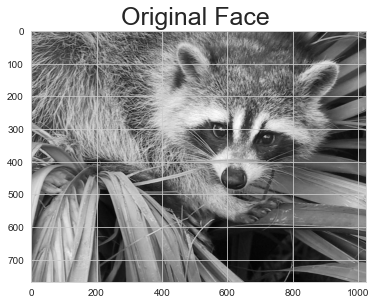

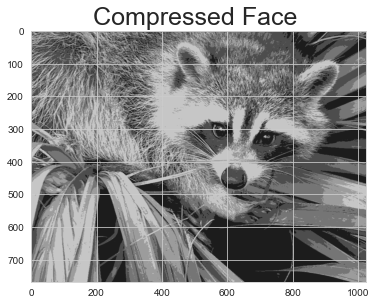

In [31]:
#Original Face
plt.figure(figsize = (6,6))
plt.imshow(face,cmap= plt.cm.gray)
plt.title("Original Face ",fontsize = 25)

#Compressed Face
plt.figure(figsize = (6,6))
plt.imshow(face_compressed,cmap= plt.cm.gray,vmin = vmin,vmax= vmax)
plt.title("Compressed Face ",fontsize = 25)

# 2.4. Problem Statement: Machine Learning 10 
***In this assignment students have to transform iris data into 3 dimensions  
and plot a 3d chart with transformed dimensions and colour each data  point with specific class.***

Hint: 

import numpy as np 

import matplotlib.pyplot as plt 

from mpl_toolkits.mplot3d import Axes3D 

from sklearn import decomposition 

from sklearn import datasets 


In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import decomposition 
from sklearn import datasets
import seaborn as sns
import pandas as pd

In [33]:
iris = sns.load_dataset('iris')

In [34]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [35]:
iris['Species'] = pd.factorize(iris.species)[0]

In [36]:
iris.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species,Species
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


Text(0.5, 0, 'petal_length')

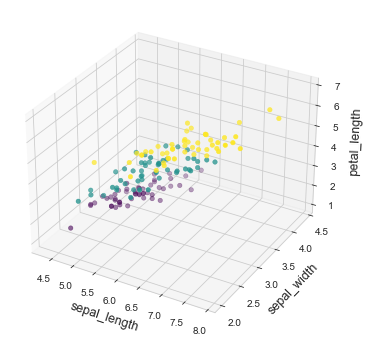

In [37]:
plt.figure(figsize = (12,6))
ax = plt.axes(projection='3d')
ax.scatter3D(iris.sepal_length,iris.sepal_width, iris.petal_length,c =iris['Species'] ,cmap='viridis', linewidth=0.5)
ax.set_xlabel('sepal_length' , fontsize = 12.5)
ax.set_ylabel("sepal_width", fontsize = 12.5)
ax.set_zlabel('petal_length', fontsize = 12.5)


# 2.5. Problem Statement: Machine Learning 11 
***In this assignment students have to make ARIMA model over shampoo sales  data and check the MSE between predicted and actual value.***

Student can download data in .csv format from the following link: 

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-yearperiod#!ds=22r0&display=line 

Hint:

Following is the command import packages  

and data from pandas import read_csv  

from pandas import datetime 

from matplotlib import pyplot 

from statsmodels.tsa.arima_model  

import ARIMA from sklearn.metrics  

import mean_squared_error def  

parser(x): 

return datetime.strptime('190'+x, '%Y-%m') 

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0],  index_col=0, squeeze=True, date_parser=parser) 


In [38]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error 

In [39]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [40]:
series = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv", header=0, parse_dates=True, index_col='Month')
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
series.dropna(axis=0,inplace=True)


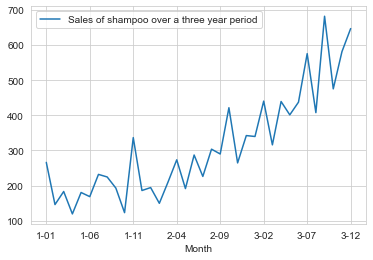

In [43]:
series.plot()
pyplot.show()

In [44]:
X= series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [45]:
size = int(len(X)*0.6)
print(len(X),'\n',size)

36 
 21


In [46]:
train,test=X[0:size],X[size:len(X)]

In [47]:
history=[x for x in train]
predictions=[]
for t in range(len(test)):
    model =ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print("Predicted = {}    Excepted = {}".format(yhat,obs))
    
error = mean_squared_error(test,predictions)
print("\n\n\nTest MSE = {}".format(round(error,ndigits=3)))

Predicted = [272.96451422]    Excepted = [421.6]
Predicted = [290.31366212]    Excepted = [264.5]
Predicted = [349.11764194]    Excepted = [342.3]
Predicted = [306.51293429]    Excepted = [339.7]
Predicted = [387.37635503]    Excepted = [440.4]
Predicted = [348.15422407]    Excepted = [315.9]
Predicted = [386.30873564]    Excepted = [439.3]
Predicted = [356.08213522]    Excepted = [401.3]
Predicted = [446.37949922]    Excepted = [437.4]
Predicted = [394.73731958]    Excepted = [575.5]
Predicted = [434.9155186]    Excepted = [407.6]
Predicted = [507.92333692]    Excepted = [682.]
Predicted = [435.48297593]    Excepted = [475.3]
Predicted = [652.74379393]    Excepted = [581.3]
Predicted = [546.34341033]    Excepted = [646.9]



Test MSE = 7547.808


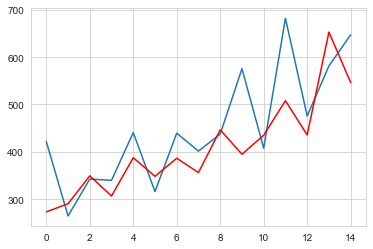

In [48]:
pyplot.plot(test)
pyplot.plot(predictions,color='red')
pyplot.show()